# imports

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.ml.feature import StringIndexer
from scipy.stats import chi2_contingency
import seaborn as sns



# Read the dataset 

In [11]:
# spark = SparkSession.builder.master("local").appName("AirlinePassengerSatisfaction").getOrCreate()
# sc = spark.sparkContext 

train =  pd.read_csv('train.csv')  
test =  pd.read_csv('test.csv')  

print("Train data shape:", train.shape)
print("Test data shape:", test.shape)

train.drop(columns=['Unnamed: 0','id'],inplace = True)
test.drop(columns=['Unnamed: 0','id'],inplace = True)

Train data shape: (103904, 25)
Test data shape: (25976, 25)


# Univariate Analysis

# Examine the dataset

In [12]:
# Examine the dataset
print("Number of rows:", train.shape[0])
print("Number of columns:", train.shape[1])
print("Column names:", train.columns)
print("Data types:\n", train.dtypes)



Number of rows: 103904
Number of columns: 23
Column names: Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')
Data types:
 Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking               

# Summary statistics

In [13]:
# Summary statistics
# print("Summary statistics:\n", train.describe())
train.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [14]:
train.describe(include=['object'])

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103904,103904,103904,103904,103904
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52727,84923,71655,49665,58879


In [15]:

# Example ordinal data
ordinal_data = train[[
        'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']]

ordinal_data = ordinal_data.astype("str")
ordinal_data.describe(include=['object'])




,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
count,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904
unique,6,6,6,6,6,6,6,6,6,6,5,6,6,6
top,3,4,3,3,4,4,4,4,4,4,4,4,4,4
freq,25868,25546,24449,28577,24359,30762,31765,29423,30867,28789,37383,29055,37945,27179


# Visualize the data - Histograms

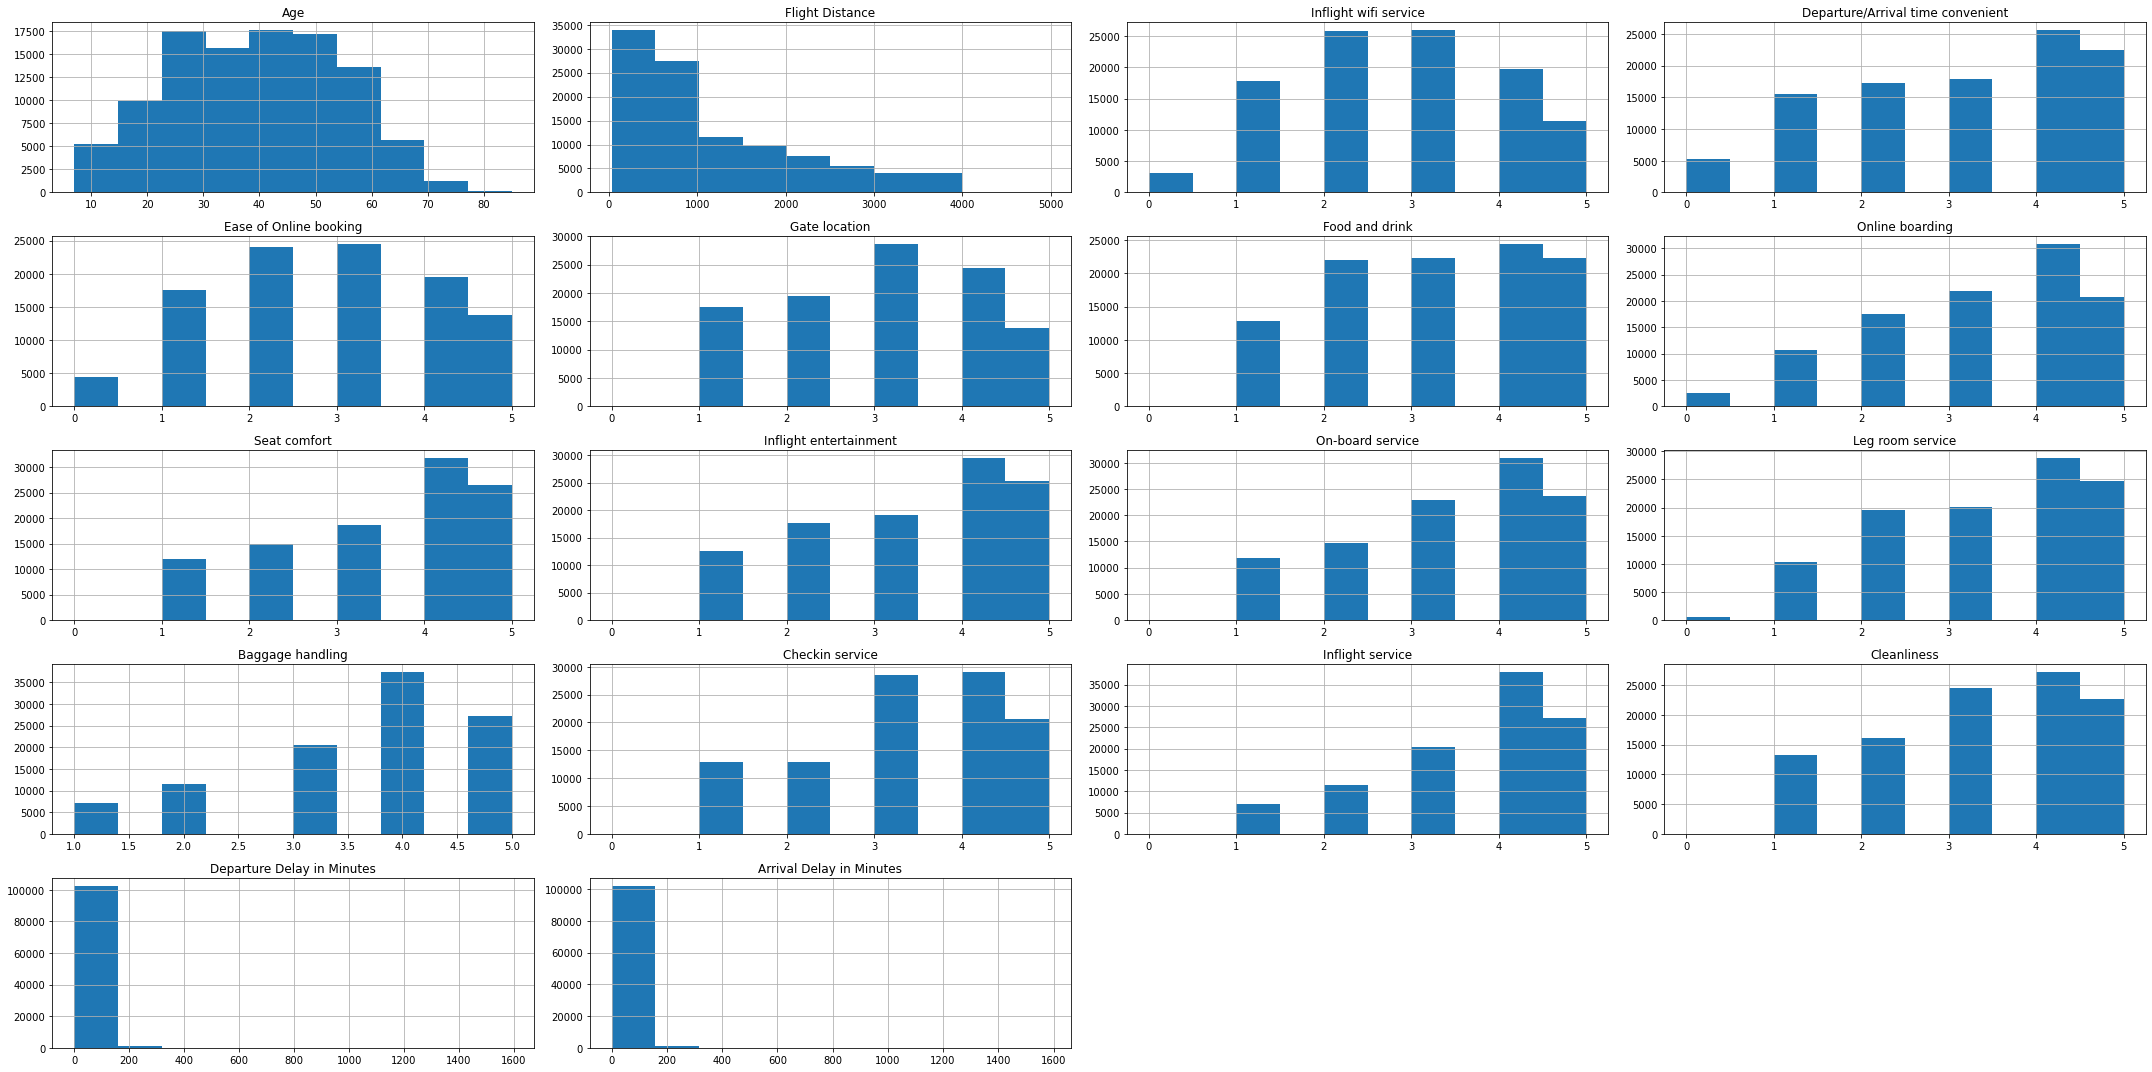

In [16]:
# Visualize the data - Histograms
train.hist(figsize=(30, 15))
plt.tight_layout()
plt.show()


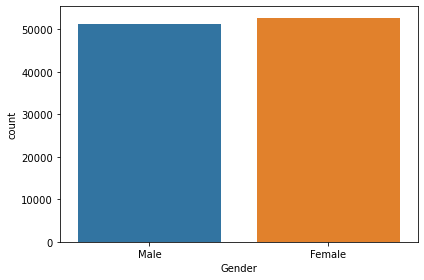

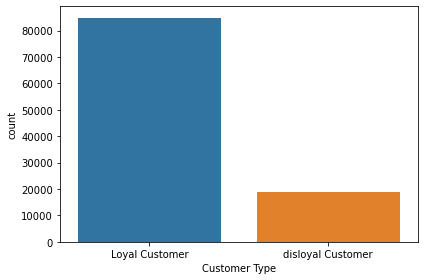

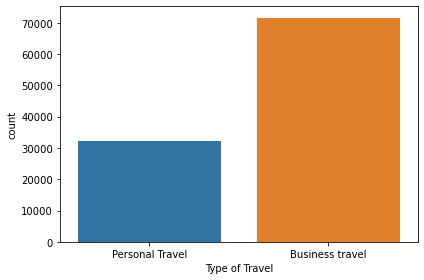

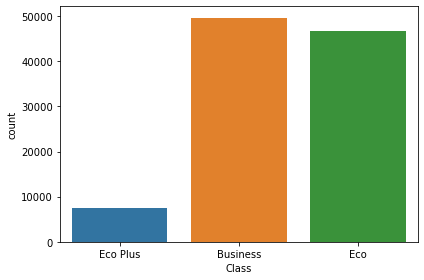

In [17]:
# Filter category columns
categorical_columns = train[['Gender', 'Customer Type','Type of Travel', 'Class']]

# Visualize the data - Count plots for categorical columns
for column in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=categorical_columns, x=column)
    plt.tight_layout()
    plt.show()

# view missing data (null values)

In [18]:
#  missing data
print("Missing values count:\n", train.isnull().sum())
# train.isnull().sum()


Missing values count:
 Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64


**Arrival Delay in Minutes  seems to has alot of values of nulls**

#  Identify outliers - Box plots

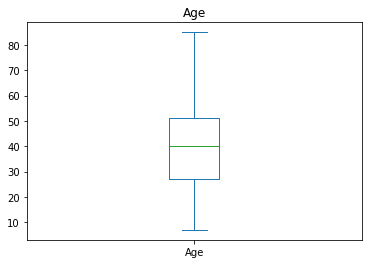

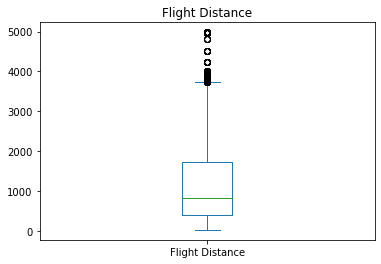

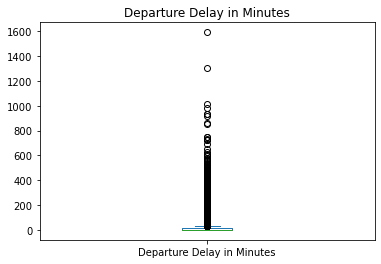

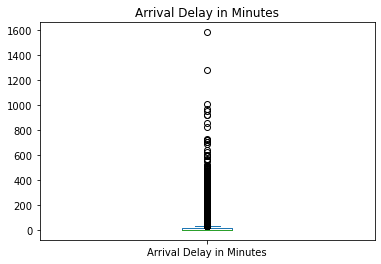

In [19]:
# # Identify outliers - Box plots
# train.plot(kind='box', figsize=(20, 10))
# plt.tight_layout()
# plt.show()

# Filter numeric columns
numeric_columns = train[['Age', 'Flight Distance', 'Departure Delay in Minutes','Arrival Delay in Minutes']]

# Iterate over each numeric column
for column in numeric_columns:
    # Create a new figure for each column
    plt.figure(figsize=(6, 4))
    
    # Generate the box plot for the current column
    train[column].plot(kind='box')
    
    # Set the title of the figure to the column name
    plt.title(column)
    
    # Display the figure
    plt.show()

**Arrival Delay in Minutes and Departure Delay in Minutes   seems to has alot of outliers**

# prior class distributions

Baseline class: neutral or dissatisfied


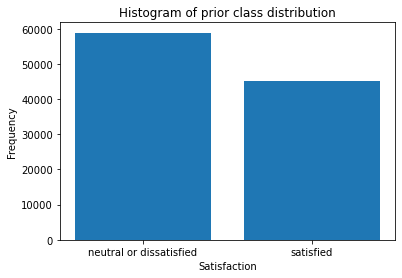

In [20]:
# Baseline Model - ZeroR
baseline_class = train['satisfaction'].value_counts().idxmax()
print("Baseline class:", baseline_class)

# Count the frequency of each category
category_counts = train['satisfaction'].value_counts()

# Create a bar plot to visualize the frequencies
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('Satisfaction')
plt.ylabel('Frequency')
plt.title('Histogram of prior class distribution')
plt.show()


**it seems that the majority of customers are neutral or dissatisfied so we should take an action**

 # Random samples

In [21]:
# Random samples

train.sample(n=5)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
38644,Male,Loyal Customer,43,Business travel,Business,1797,4,4,4,4,...,4,4,4,4,5,4,5,86,73.0,satisfied
43924,Female,Loyal Customer,8,Personal Travel,Eco,216,3,0,3,2,...,1,3,3,4,5,4,1,4,8.0,neutral or dissatisfied
67346,Female,disloyal Customer,23,Business travel,Eco,1109,5,5,5,1,...,3,2,5,3,2,5,3,14,18.0,satisfied
93791,Male,Loyal Customer,11,Personal Travel,Eco,1670,3,5,3,3,...,2,3,4,4,3,4,2,6,0.0,neutral or dissatisfied
7140,Female,Loyal Customer,40,Personal Travel,Eco,199,3,4,3,3,...,5,4,2,4,3,4,5,0,0.0,neutral or dissatisfied


# correlations

# nominal and nominal correlation

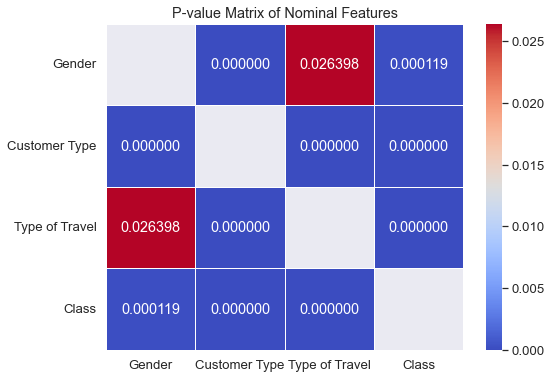

In [22]:


# Select the nominal features
nominal_features = train[['Gender', 'Customer Type', 'Type of Travel', 'Class']]

def nominal_correlations():
    p_value_df = pd.DataFrame(index=nominal_features.columns, columns=nominal_features.columns)

    # Iterate over all combinations of nominal features
    for i in range(len(nominal_features.columns)):
        for j in range(i+1, len(nominal_features.columns)):
            feature1 = nominal_features.columns[i]
            feature2 = nominal_features.columns[j]

            # Create a contingency table for the current feature combination
            contingency_table = pd.crosstab(nominal_features[feature1], nominal_features[feature2])

            # Perform the chi-square test for independence
            chi2, p_value, _, _ = chi2_contingency(contingency_table)

            # Store the p-value in the matrix
            p_value_df.loc[feature1, feature2] = p_value
            p_value_df.loc[feature2, feature1] = p_value

    return p_value_df

p_value_df = nominal_correlations()

# Set up the plot
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)

# Create the heatmap plot
sns.heatmap(p_value_df.astype(float), annot=True, cmap='coolwarm', fmt=".6f", linewidths=0.5)

# Add plot title
plt.title("P-value Matrix of Nominal Features")

# Display the plot
plt.show()

**it seems that type of travel and gender are correlated** 

**it seems that class and gender are correlated** 


# numerical and numerical correlation

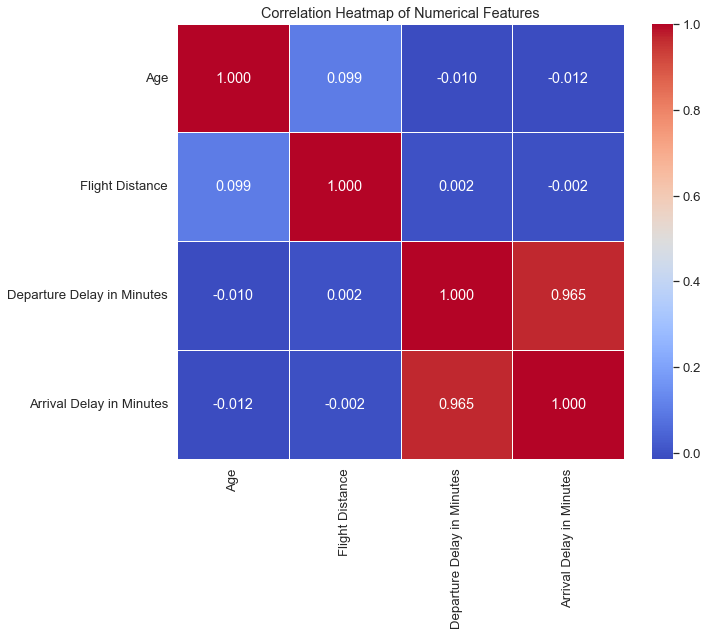

In [35]:

# Select the numertical features
numerical_features = train[['Age', 'Flight Distance', 'Departure Delay in Minutes','Arrival Delay in Minutes']]
# Compute the correlation matrix
correlation_matrix = numerical_features.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# ordinal and ordinal correlation 

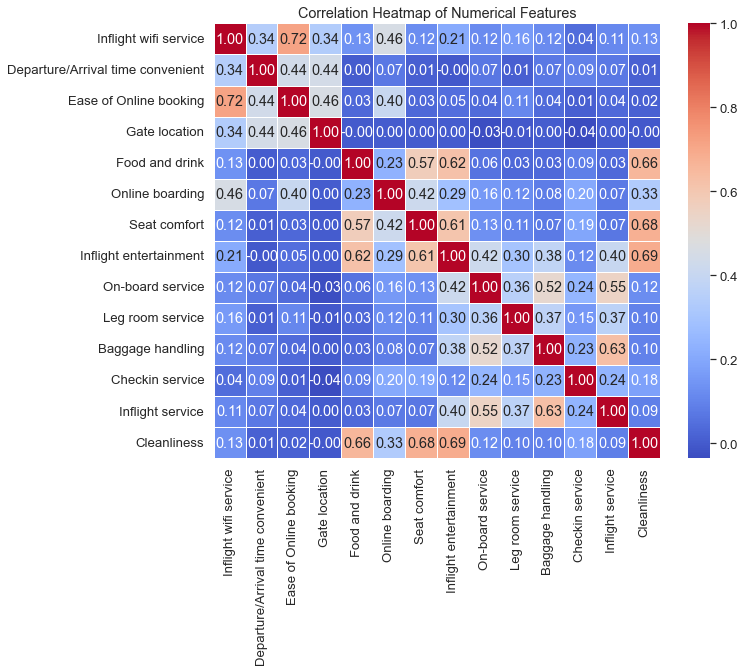

In [28]:

# Select the numertical features
ordinal_data = train[[
        'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']]
# Compute the correlation matrix
correlation_matrix = ordinal_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# nominal and ordinal correlation

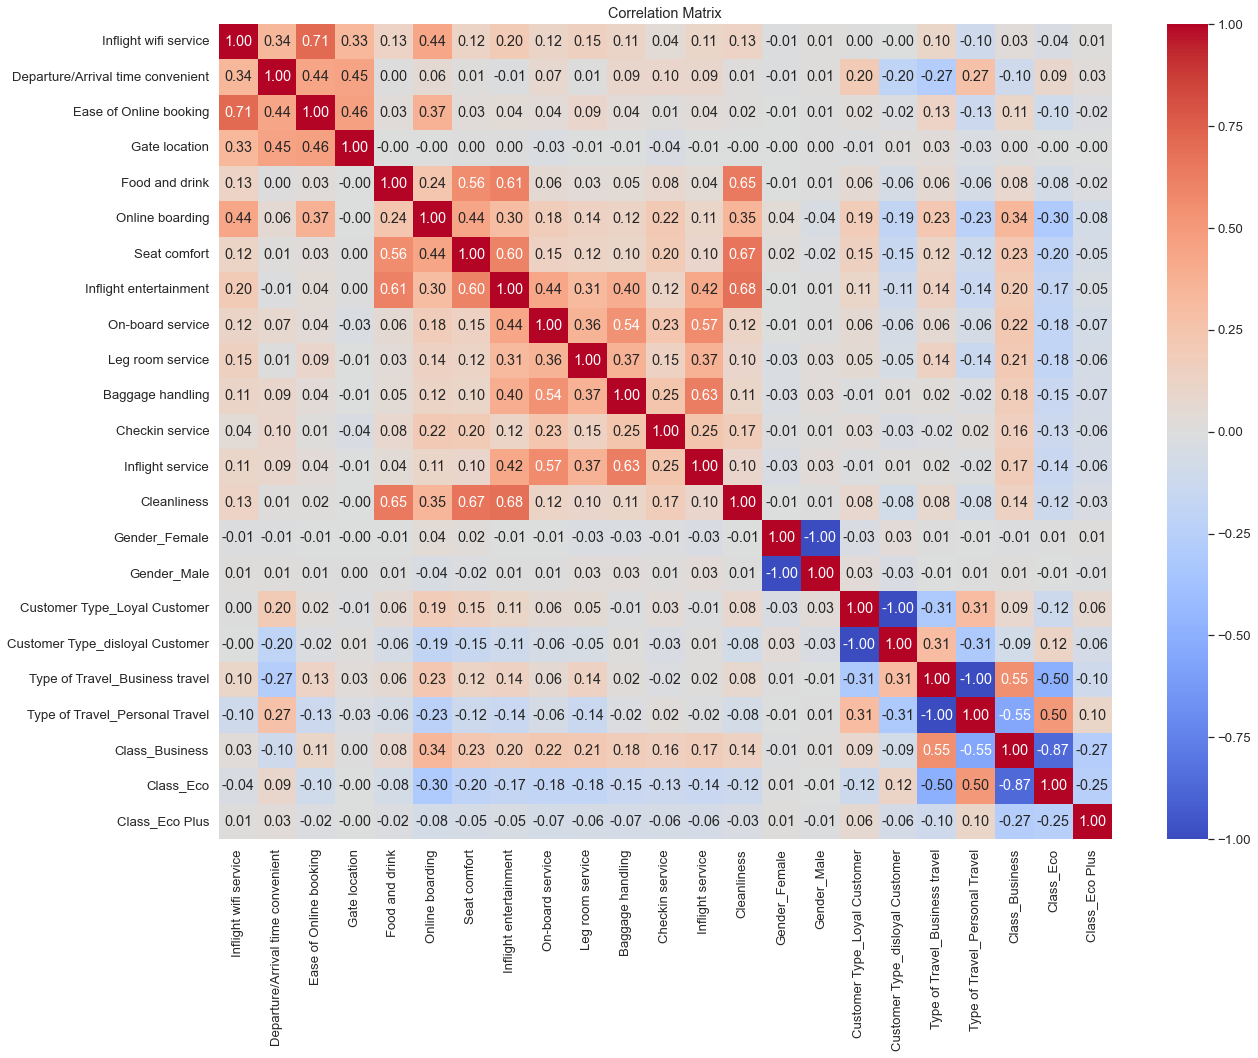

In [31]:
nominal_features = train[['Gender', 'Customer Type', 'Type of Travel', 'Class']]
ordinal_data = train[[
        'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']]

# Encode nominal data using one-hot encoding
nominal_encoded = pd.get_dummies(nominal_features)

# Combine ordinal and encoded nominal data frames
combined_df = pd.concat([ordinal_data , nominal_encoded], axis=1)
# Calculate correlation using suitable method (e.g., Spearman's rank correlation)
correlation_matrix = combined_df.corr(method='spearman')

# Plot heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# ordinal and numerical correlation

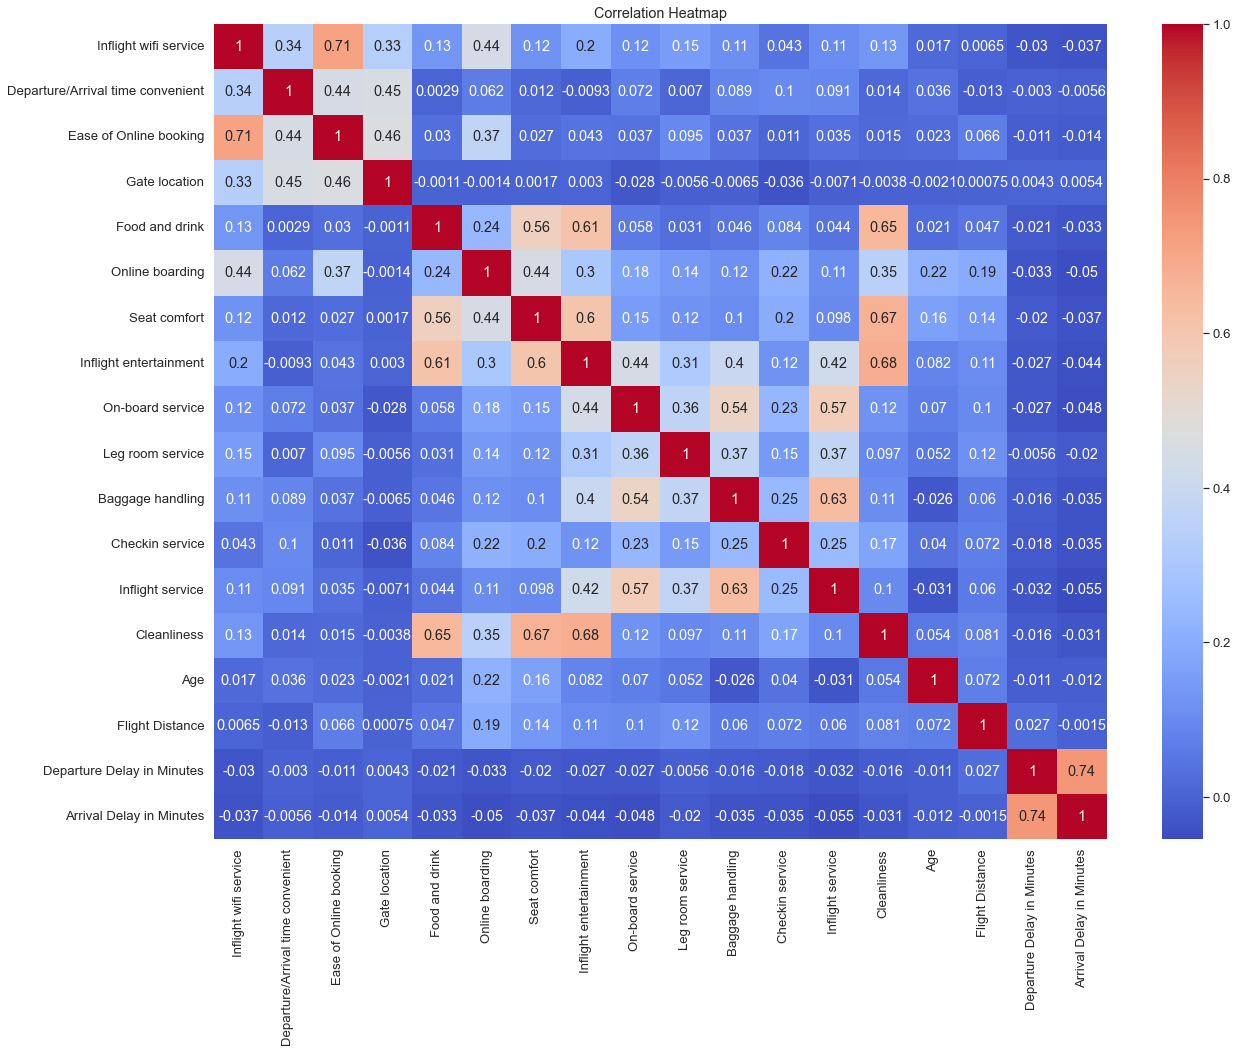

In [38]:
ordinal_data = train[[
        'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']]

numerical_features = train[['Age', 'Flight Distance', 'Departure Delay in Minutes','Arrival Delay in Minutes']]
# Combine ordinal and encoded nominal data frames
combined_df = pd.concat([ordinal_data , numerical_features], axis=1)
# Calculate correlation using suitable method (e.g., Spearman's rank correlation)
correlation_matrix = combined_df.corr(method='spearman')

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix  , annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# nominal and numerical correlation

In [40]:
numerical_features = train[['Age', 'Flight Distance', 'Departure Delay in Minutes','Arrival Delay in Minutes']]
nominal_features = train[['Gender', 'Customer Type', 'Type of Travel', 'Class']]

# # Merge the DataFrames based on a common index or column
# merged_df = pd.merge(nominal_features,numerical_features, left_index=True, right_index=True)

# # Calculate the correlation matrix
# correlation_matrix = merged_df.groupby('Group')['Value'].mean().unstack()

# # Create a heatmap
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.title("Correlation Matrix Heatmap")
# plt.show()